In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
import json

#from sklearn.preprocessing import MultiLabelBinarizer
from sklearn.preprocessing import OneHotEncoder

# Count tweets per day, pre-filter

In [3]:
# Get number of tweets in raw data
folders = os.listdir("./Raw Data")

dates = []
num_tweets = []
for folder in folders:
    filenames = os.listdir("./Raw Data/" + folder)
    cur_count = 0
    for filename in filenames:
        f = open("./Raw Data/" + folder + "/" + filename)
        data = json.load(f)
        f.close()
        cur_count += len(data)
        
    dates.append(folder)
    num_tweets.append(cur_count)

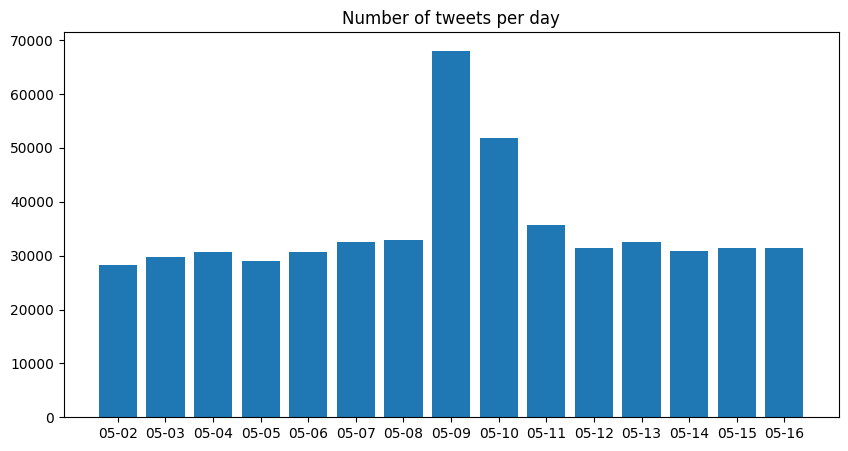

In [4]:
# Create bar graph
fig = plt.figure(figsize =(10, 5))
plt.bar(dates, num_tweets)
plt.title("Number of tweets per day")
plt.show()

# Get annotation statistics per batch

In [10]:
# Load in all CSVs saved in folder
directory = "./Data/CSVs/With stopwords"

filenames = os.listdir(directory)

dfs = []

for filename in filenames:
    dfs.append(pd.read_csv(directory + "/" + filename))

In [8]:
# Remove disregarded text and apply OHE
for i in range(len(dfs)):
    cur = dfs[i]
    
    cur = cur.dropna(subset=["Text"])
    cur = cur.drop("Text", axis=1)
    
    cur = cur[cur["Disregard"] == "KEEP"]
    cur = cur.drop("Disregard", axis=1)
    cur.reset_index(inplace=True, drop=True)
    
    # Prepare one-hot encoders
    encoder = OneHotEncoder(sparse_output=False)
    
    # Apply one-hot encoding to class
    new_classes = pd.DataFrame(encoder.fit_transform(cur[['Class']]))
    new_classes.columns = encoder.get_feature_names_out()

    cur = pd.concat([cur, new_classes],axis=1)
    
    # Drop "Class" and "Labels" column
    cur = cur.drop(['Class'],axis=1,inplace=False)
    
    # Remove "Class_" in labels
    class_map = {"Class_Explicit": "Explicit", "Class_Implicit": "Implicit",
                 "Class_Non-abusive": "Non-abusive", "Class_No Plurality": "No Plurality"}
    cur = cur.rename(columns=class_map)
    
    dfs[i] = cur

In [9]:
# Create summary data
colnames = ['Batch']
colnames += dfs[0].columns.values[:10].tolist()
colnames += dfs[0].columns.values[10:].tolist()
data_df = pd.DataFrame(columns=colnames)

for batch, df in zip(filenames, dfs):
    new_data = pd.concat([pd.Series(batch[:-4], index=["Batch"]), df.sum().astype(int)])
    data_df = pd.concat([data_df, new_data.to_frame().T], ignore_index=True)
data_df = data_df.set_index("Batch")

main_class_df = data_df[data_df.columns[-3:]]
sub_class_df = data_df[data_df.columns[:-3]]
data_df.drop(["Explicit", "Implicit", "Non-abusive"], axis=1)

,E1,E2,E3,I1,I2,I3,I4,I5,I6,I7
Batch,,,,,,,,,,
05-06_0,11,17,0,4,14,0,1,0,2,47
05-07_0,6,13,0,2,13,0,1,0,1,17
05-08_0,19,32,2,3,32,0,1,1,6,65
05-09_0,64,23,0,8,26,0,3,4,10,94
05-10_0,54,57,2,20,45,0,6,0,13,175
05-10_1,33,41,2,6,51,0,1,3,12,116
05-11_0,42,55,0,8,25,0,4,1,7,51
05-12_0,28,63,2,11,22,0,7,1,10,44
05-13_0,29,58,1,6,22,0,4,5,6,57


In [15]:
sub_class_df

,E1,E2,E3,I1,I2,I3,I4,I5,I6,I7
Batch,,,,,,,,,,
05-06_0,11,17,0,4,14,0,1,0,2,47
05-07_0,6,13,0,2,13,0,1,0,1,17
05-08_0,19,32,2,3,32,0,1,1,6,65
05-09_0,64,23,0,8,26,0,3,4,10,94
05-10_0,54,57,2,20,45,0,6,0,13,175
05-10_1,33,41,2,6,51,0,1,3,12,116
05-11_0,42,55,0,8,25,0,4,1,7,51
05-12_0,28,63,2,11,22,0,7,1,10,44
05-13_0,29,58,1,6,22,0,4,5,6,57


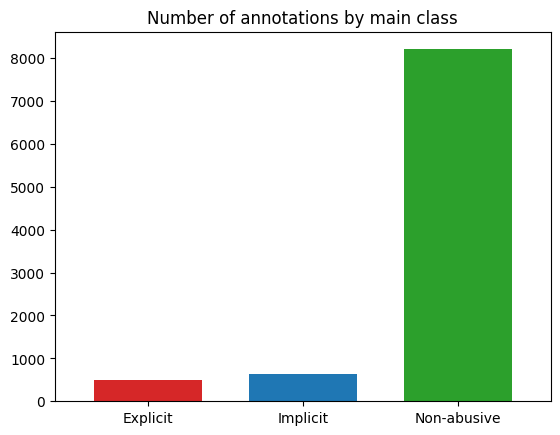

In [5]:
ax = main_class_df.sum().plot(kind="bar",
                        width=0.7,
                        color=["tab:red", "tab:blue", "tab:green"],
                        title="Number of annotations by main class")
ax.tick_params(axis='x', labelrotation = 0)

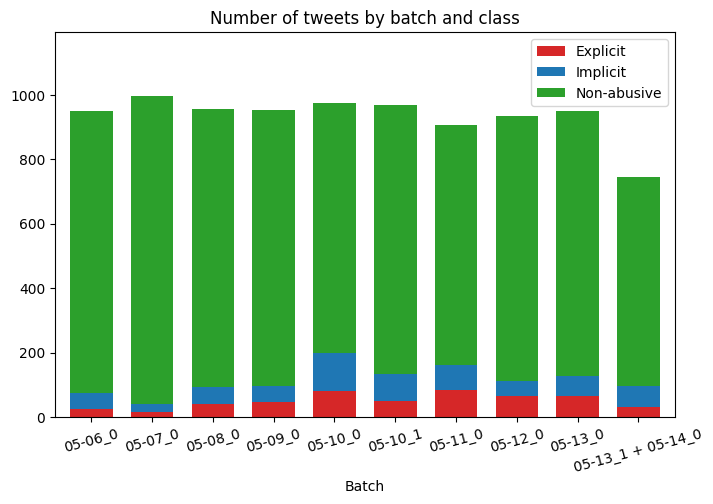

In [10]:
# Plot stacked bar graph
ax = main_class_df.plot(figsize=(8, 5),
                        kind="bar",
                        stacked=True,
                        width=0.7,
                        color=["tab:red", "tab:blue", "tab:green"],
                        title="Number of tweets by batch and class")
ax.set_ylim(0, ax.get_ylim()[1] + 150)
ax.legend(loc="upper right")
ax.tick_params(axis='x', labelrotation = 15)

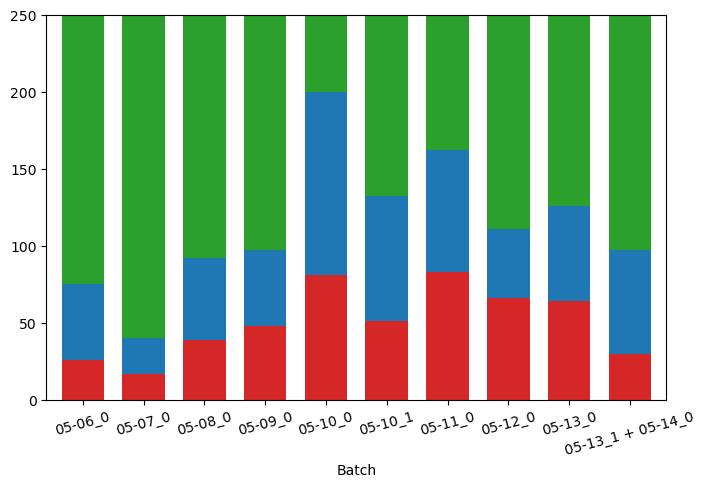

In [126]:
# Plot stacked bar graph
ax = main_class_df.plot(figsize=(8, 5),
                        kind="bar",
                        stacked=True,
                        width=0.7,
                        color=["tab:red", "tab:blue", "tab:green"],
                        legend=False)
ax.set_ylim(0, 250)
ax.tick_params(axis='x', labelrotation = 15)

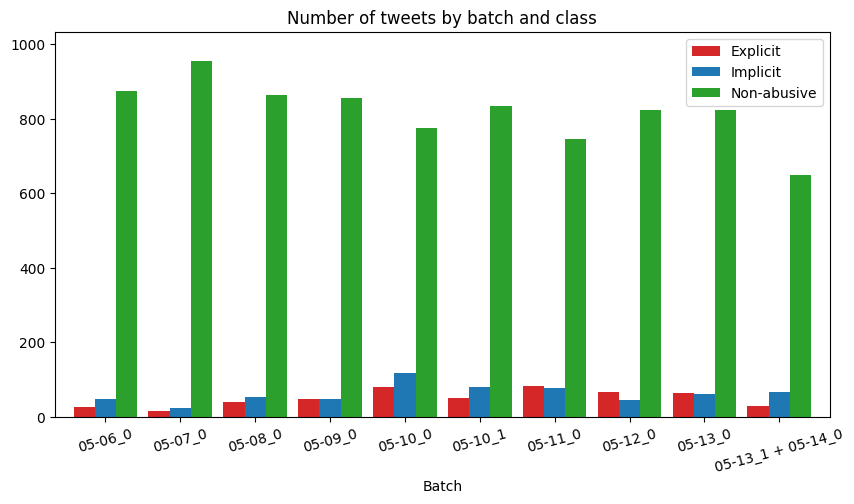

In [9]:
# Plot stacked bar graph
ax = main_class_df.plot(figsize=(10, 5),
                        kind="bar",
                        width=0.85,
                        color=["tab:red", "tab:blue", "tab:green"],
                        title="Number of tweets by batch and class")
ax.set_ylim(0, ax.get_ylim()[1] + 30)
ax.legend(loc="upper right")
ax.tick_params(axis='x', labelrotation = 15)

In [155]:
main_class_df.sum()

Class_Explicit        505
Class_Implicit        627
Class_Non-abusive    8203
dtype: object

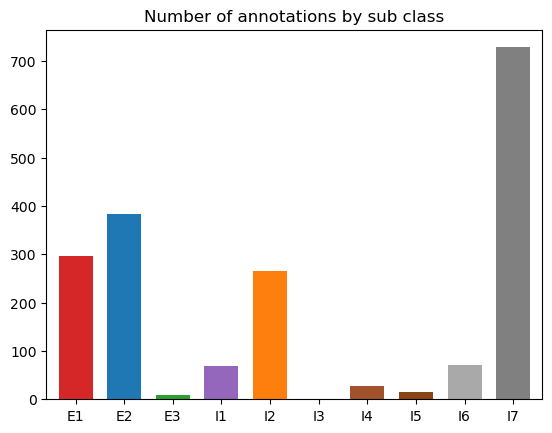

In [11]:
ax = sub_class_df.sum().plot(kind="bar",
                        width=0.7,
                        color=["tab:red", "tab:blue", "tab:green", # E1-E3
                              "tab:purple", "tab:orange", "yellow", "sienna", # I1-I4
                               "saddlebrown", "darkgrey", "grey"], # I5-I7
                        title="Number of annotations by sub class")
ax.tick_params(axis='x', labelrotation = 0)

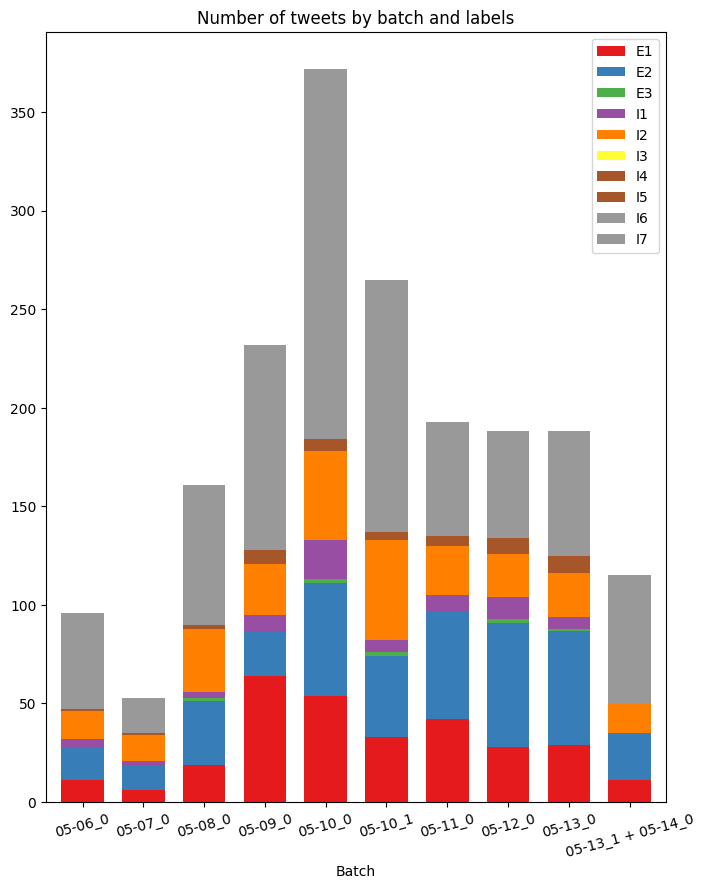

In [11]:
# Plot stacked bar graph
ax = sub_class_df.plot(figsize=(8, 10),
                        kind="bar",
                        stacked=True,
                        width=0.7,
                        colormap="Set1",
                        #color=["red", "lightcoral", "mistyrose", # E1-E3
                        #      "midnightblue", "blue", "royalblue", "steelblue", # I1-I4
                        #       "dodgerblue", "deepskyblue", "lightskyblue"], # I5-I7
                        title="Number of tweets by batch and labels")
ax.legend(loc="upper right")
ax.tick_params(axis='x', labelrotation = 15)

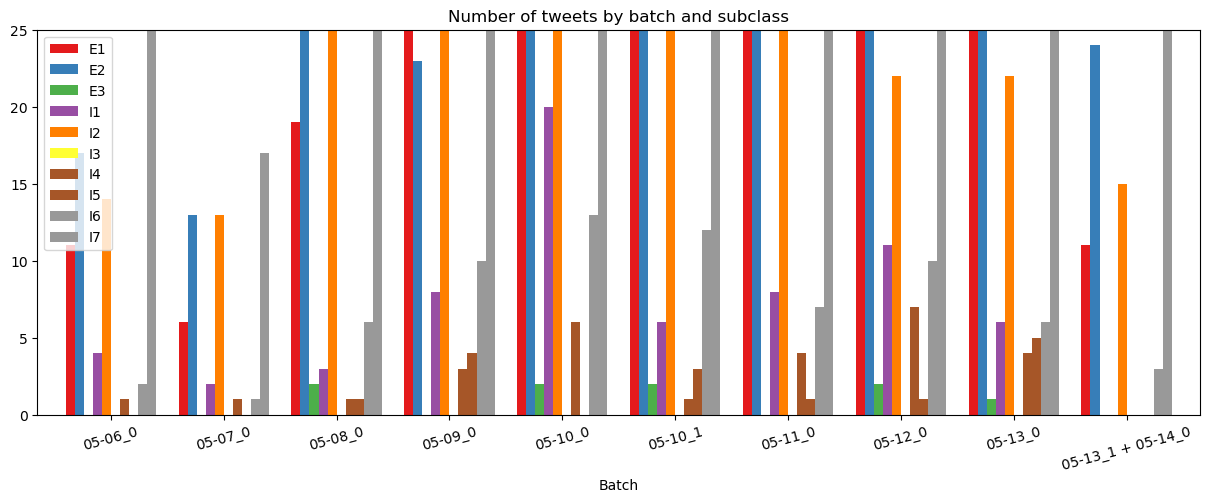

In [129]:
# Plot stacked bar graph
ax = sub_class_df.plot(figsize=(15, 5),
                        kind="bar",
                        width=0.8,
                        colormap="Set1",
                        #color=["red", "lightcoral", "mistyrose", # E1-E3
                        #      "midnightblue", "blue", "royalblue", "steelblue", # I1-I4
                        #       "dodgerblue", "deepskyblue", "lightskyblue"], # I5-I7
                        title="Number of tweets by batch and subclass")
ax.set_ylim(0, 25)
ax.legend(loc="upper left")
ax.tick_params(axis='x', labelrotation = 15)

# Dataset Distribution

In [1]:
def load_csv(dataset, use_stopwords):
    if dataset not in ["train", "validate", "test"]:
        raise Exception("Invalid split.")
    if type(use_stopwords) != bool:
        raise Exception("Stop words must be specified in boolean.")
    
    stopwords = "With Stopwords"
    if not use_stopwords:
        stopwords = "Without Stopwords"
    df = pd.read_csv(f"./Data/{stopwords}/{dataset}.csv")
    
    return df

In [4]:
train_df = load_csv("train", True)
test_df = load_csv("test", True)
val_df = load_csv("validate", True)

In [11]:
dfs = pd.concat([train_df, test_df, val_df])
dfs.sum(numeric_only=True)

Class    1507
E1        250
E2        325
E3          6
I1         41
I2        169
I3          0
I4         20
I5         11
I6         49
I7        419
dtype: int64